# <center>  Influential Factors in Determining the Happiness each Country </center>


<center>

<img src="https://blog.deliveringhappiness.com/hubfs/Imported_Blog_Media/The-World-Happiness-Report-4.jpg" width="600">
</center>

The World Happiness Report may be a point of interest survey of the state of worldwide bliss. The primary report was distributed in 2012, the second in 2013, the third in 2015, and the fourth within the 2016 Upgrade. The World Joy 2017, which positions 155 nations by their bliss levels, was discharged at the Joined together Countries at an occasion celebrating Universal Day of Joy on Walk 20th. The report proceeds to pick up worldwide acknowledgment as governments, organizations and respectful society progressively utilize joy pointers to educate their policy-making choices. Driving specialists over areas – financial matters, brain research, overview investigation, national insights, wellbeing, open approach and more – depict how estimations of well-being can be used effectively to evaluate the advance of countries. The reports survey the state of bliss within the world nowadays and appear how the modern science of bliss clarifies individual and national varieties in bliss.


The joy scores and rankings utilize information from the Gallup World Survey. The scores are based on answers to the most life evaluation address inquired within the survey. This address, known as the Cantril step, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a and to rate their claim current lives on that scale. The scores are from broadly agent tests for the a long time 2013-2016 and utilize the Gallup weights to create the gauges agent. The columns taking after the bliss score assess the degree to which each of six variables – financial generation, social back, life anticipation, flexibility, nonattendance of debasement, and liberality – contribute to making life assessments higher in each nation than they are in Dystopia, a theoretical nation that has values rise to to the world’s least national midpoints for each of the six variables. They have no affect on the full score detailed for each nation, but they do exp

This file contains the Happiness Score for 153 countries along with the factors used to explain the score.

The Happiness Score is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder.


The Happiness Score is explained by the following factors:

* GDP per capita
* Healthy Life Expectancy
* Social support
* Freedom to make life choices
* Generosity
* Corruption Perception
* Residual error


Source dataset: https://www.kaggle.com/mathurinache/world-happiness-report

# Ok Let's Analyse the data using Data Visualization

Import Library

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/world-happiness-report/2015.csv
/kaggle/input/world-happiness-report/2017.csv
/kaggle/input/world-happiness-report/2019.csv
/kaggle/input/world-happiness-report/2020.csv
/kaggle/input/world-happiness-report/2018.csv
/kaggle/input/world-happiness-report/2016.csv


In [2]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



Read Dataset

In [3]:
y_2015 = pd.read_csv('/kaggle/input/world-happiness-report/2015.csv')
y_2016 = pd.read_csv('/kaggle/input/world-happiness-report/2016.csv')
y_2017 = pd.read_csv('/kaggle/input/world-happiness-report/2017.csv')
y_2018 = pd.read_csv('/kaggle/input/world-happiness-report/2018.csv')
y_2019 = pd.read_csv('/kaggle/input/world-happiness-report/2019.csv')
y_2020 = pd.read_csv('/kaggle/input/world-happiness-report/2020.csv')

Data= y_2015.append([y_2015,y_2016,y_2017,y_2018, y_2019,y_2020])
x = Data.iloc[:, [3]].values

In [4]:
Data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,lowerwhisker,Logged GDP per capita,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check Missing Data



In [5]:
print("Any missing sample in train set:",Data.isnull().values.any(), "\n")


Any missing sample in train set: True 



Handling missing data



In [6]:
Data = Data.replace([np.inf, -np.inf], np.nan)
Data =Data.fillna(0)
Data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,lowerwhisker,Logged GDP per capita,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,3.250141,6.625160,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,3.209547,7.600104,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,3.184198,7.865712,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,2.605684,7.425360,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


# Happiness Country by Happiness_Rank

In [7]:
Data['Happiness_Rank'] = Data['Happiness Rank']
Data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Logged GDP per capita,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Happiness_Rank
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,6.625160,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,0.0
149,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,7.600104,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,0.0
150,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,7.865712,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,0.0
151,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,7.425360,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,0.0


## Distributional data of Happiness_Rank

Text(0.5, 1.0, 'Distributional data of Happiness_Rank')

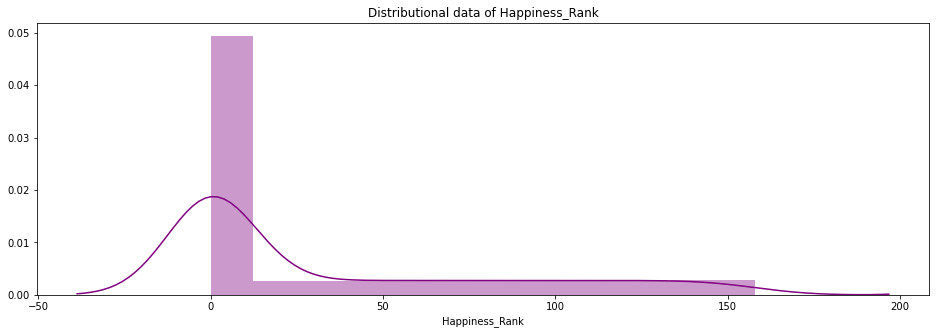

In [8]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(Data["Happiness_Rank"], color="purple",ax = axes)
plt.title("Distributional data of Happiness_Rank")

## Countplot of Happiness Country by Happiness_Rank

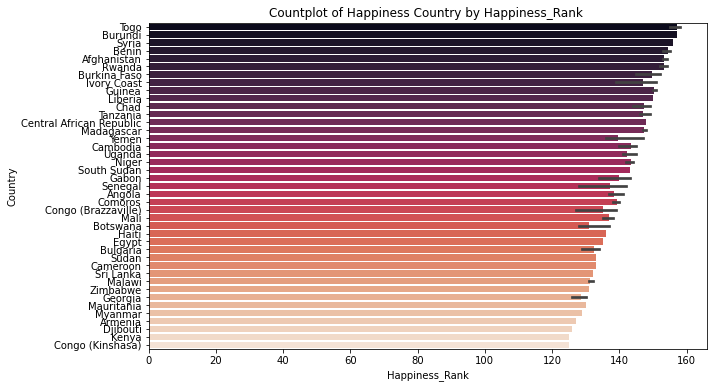

In [9]:
Happiness_c = Data.sort_values(by='Happiness_Rank', ascending=False)[:100]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=Happiness_c.Country, x=Happiness_c.Happiness_Rank,palette="rocket")
plt.xticks()
plt.xlabel('Happiness_Rank')
plt.ylabel('Country')
plt.title('Countplot of Happiness Country by Happiness_Rank ')
plt.show()

# Happiness Country by Happiness_Score

In [10]:
Data['Happiness_Score'] = Data['Happiness Score']
Data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Happiness_Rank,Happiness_Score
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,7.587
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,7.561
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,7.527
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,7.522
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,7.427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,0.0,0.000
149,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,0.0,0.000
150,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,0.0,0.000
151,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,0.0,0.000


## Distributional data of Happiness_Score

Text(0.5, 1.0, 'Distributional data of Happiness_Score')

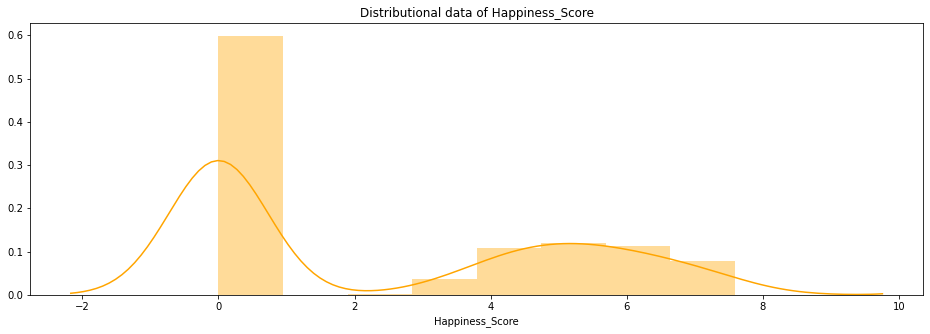

In [11]:
f2, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(Data["Happiness_Score"], color="orange",ax = axes)
plt.title("Distributional data of Happiness_Score")

## Countplot of Happiness Country by Happiness Score

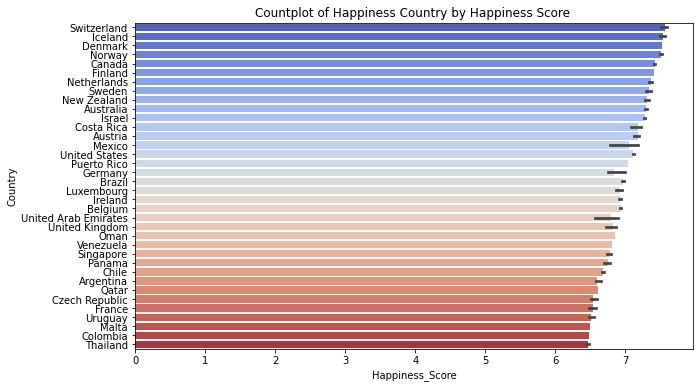

In [12]:
Happiness_c= Data.sort_values(by='Happiness_Score', ascending=False)[:100]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=Happiness_c.Country, x=Happiness_c.Happiness_Score,palette="coolwarm")
plt.xticks()
plt.xlabel('Happiness_Score')
plt.ylabel('Country')
plt.title('Countplot of Happiness Country by Happiness Score ')
plt.show()

# Economy (GDP per Capita) 

In [13]:
Data['Economy_GDPperCapita'] = Data['Economy (GDP per Capita)']
Data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Happiness_Rank,Happiness_Score,Economy_GDPperCapita
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,7.587,1.39651
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,7.561,1.30232
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,7.527,1.32548
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,7.522,1.45900
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,7.427,1.32629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,0.0,0.000,0.00000
149,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,0.0,0.000,0.00000
150,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,0.0,0.000,0.00000
151,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,0.0,0.000,0.00000


## Distributional of Economy_GDPperCapita

Text(0.5, 1.0, 'Distributional data of Economy GDP per Capita')

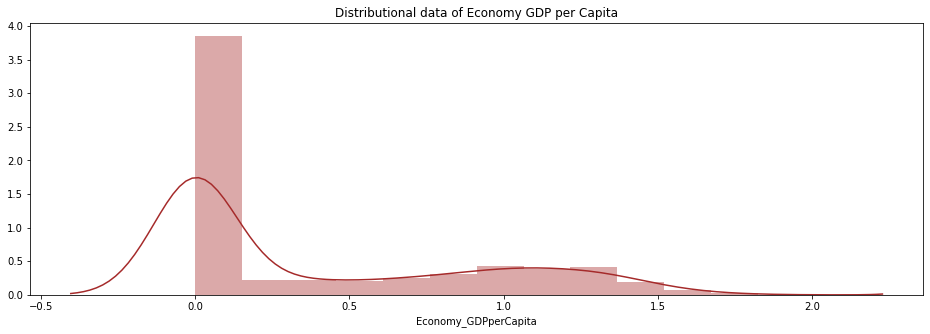

In [14]:
f3, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(Data["Economy_GDPperCapita"], color="brown",ax = axes)
plt.title("Distributional data of Economy GDP per Capita")

## Countplot of Economy (GDP per Capita) each Country

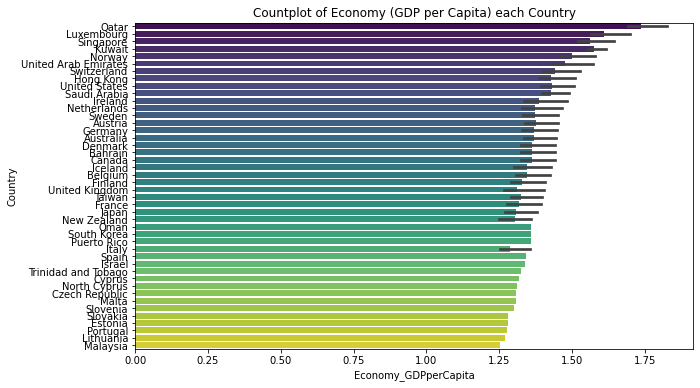

In [15]:
GDP = Data.sort_values(by='Economy_GDPperCapita', ascending=False)[:100]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=GDP.Country, x=GDP.Economy_GDPperCapita,palette="viridis")
plt.xticks()
plt.xlabel('Economy_GDPperCapita')
plt.ylabel('Country')
plt.title('Countplot of Economy (GDP per Capita) each Country')
plt.show()

# Happiness Country by Family

## Distributional data of Family

Text(0.5, 1.0, 'Distributional data of Family')

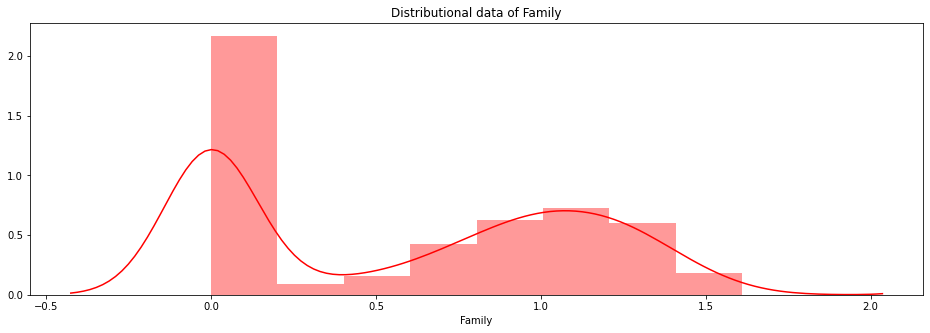

In [16]:
f4, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(Data["Family"], color="red",ax = axes)
plt.title("Distributional data of Family")

## Countplot of Happiness Country by Family

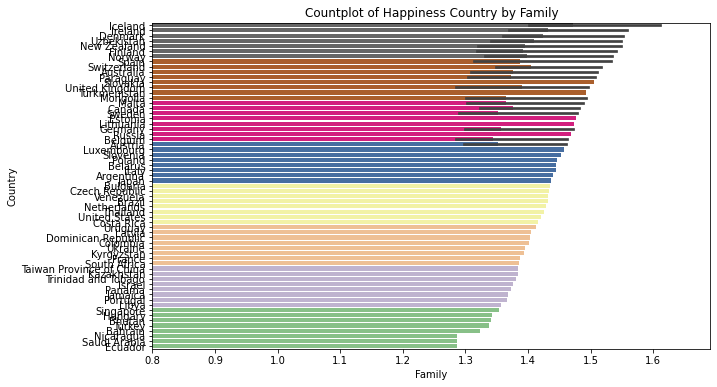

In [17]:
Fam_c = Data.sort_values(by='Family', ascending=False)[:100]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=Fam_c.Country, x=Fam_c.Family,palette="Accent_r")
plt.xticks()
plt.xlim(xmin=0.8)
plt.xlabel('Family')
plt.ylabel('Country')
plt.title('Countplot of Happiness Country by Family')
plt.show()

# Happiness Country by Freedom

Text(0.5, 1.0, 'Distributional data of Freedom')

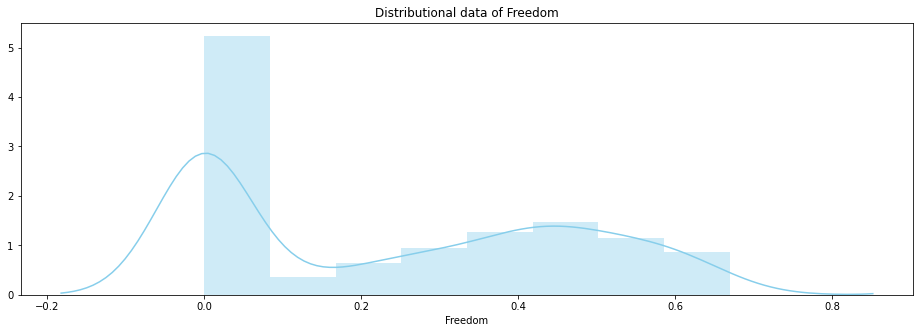

In [18]:
f5, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(Data["Freedom"], color="skyblue",ax = axes)
plt.title("Distributional data of Freedom")

## Countplot of Happiness Country by Freedom

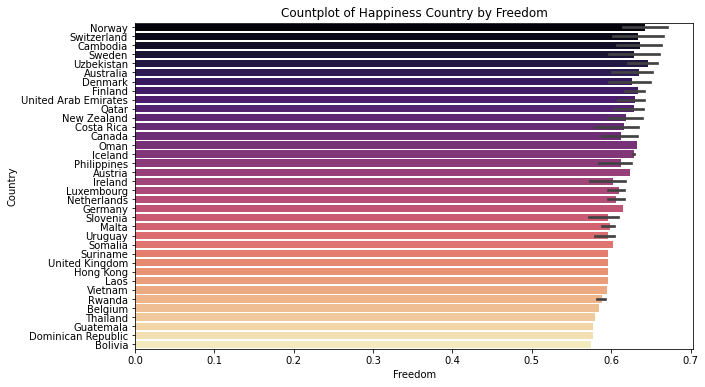

In [19]:
Freedom_c = Data.sort_values(by='Freedom', ascending=False)[:100]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=Freedom_c.Country, x=Freedom_c.Freedom,palette="magma")
plt.xticks()
plt.xlabel('Freedom')
plt.ylabel('Country')
plt.title('Countplot of Happiness Country by Freedom')
plt.show()

# Happiness Country by Trust (Government Corruption)

In [20]:
Data['Trust'] = Data['Trust (Government Corruption)']
Data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Happiness_Rank,Happiness_Score,Economy_GDPperCapita,Trust
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,7.587,1.39651,0.41978
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,7.561,1.30232,0.14145
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,7.527,1.32548,0.48357
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,7.522,1.45900,0.36503
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,7.427,1.32629,0.32957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,0.0,0.000,0.00000,0.00000
149,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,0.0,0.000,0.00000,0.00000
150,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,0.0,0.000,0.00000,0.00000
151,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,0.0,0.000,0.00000,0.00000


## Distributional data of Trust

Text(0.5, 1.0, 'Distributional data of Trust')

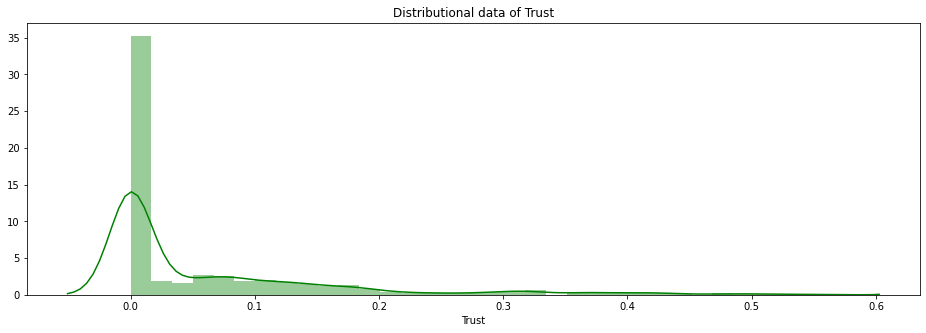

In [21]:
f6, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(Data["Trust"], color="green",ax = axes)
plt.title("Distributional data of Trust")

## Countplot of Happiness Country by Trust

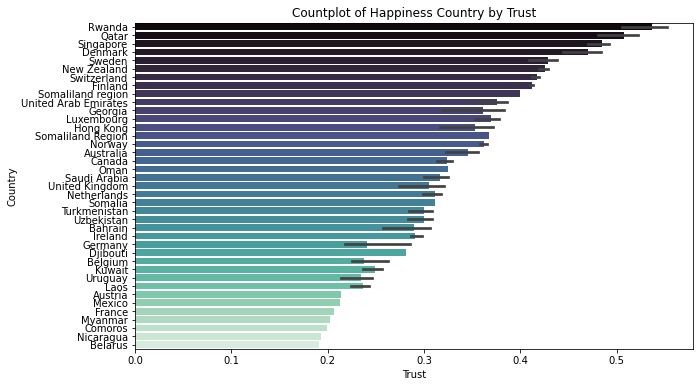

In [22]:
Trust_c = Data.sort_values(by='Trust', ascending=False)[:100]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=Trust_c.Country, x=Trust_c.Trust,palette="mako")
plt.xticks()
plt.xlabel('Trust')
plt.ylabel('Country')
plt.title('Countplot of Happiness Country by Trust')
plt.show()

# Happiness Country by Health (Life Expectancy)	

In [23]:
Data['Health'] = Data['Health (Life Expectancy)']
Data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Happiness_Rank,Happiness_Score,Economy_GDPperCapita,Trust,Health
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,7.587,1.39651,0.41978,0.94143
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,7.561,1.30232,0.14145,0.94784
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,7.527,1.32548,0.48357,0.87464
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,7.522,1.45900,0.36503,0.88521
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,7.427,1.32629,0.32957,0.90563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.292814,0.253513,0.028265,2.860198,0.0,0.000,0.00000,0.00000,0.00000
149,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.572383,0.604088,0.235705,0.485542,0.548445,0.0,0.000,0.00000,0.00000,0.00000
150,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.375038,0.377405,0.151349,0.080929,0.841031,0.0,0.000,0.00000,0.00000,0.00000
151,0,0,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.208809,0.065609,0.209935,0.111157,1.378751,0.0,0.000,0.00000,0.00000,0.00000


## Distributional data of Health

Text(0.5, 1.0, 'Distributional data of Health')

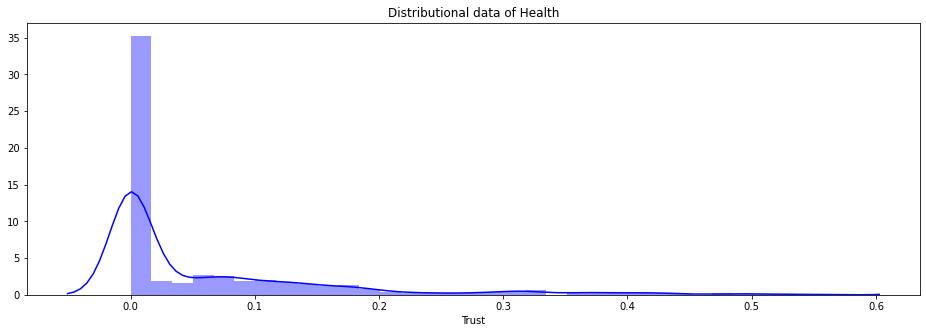

In [24]:
f7, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(Data["Trust"], color="blue",ax = axes)
plt.title("Distributional data of Health")

## Countplot of Happiness Country by  by Health

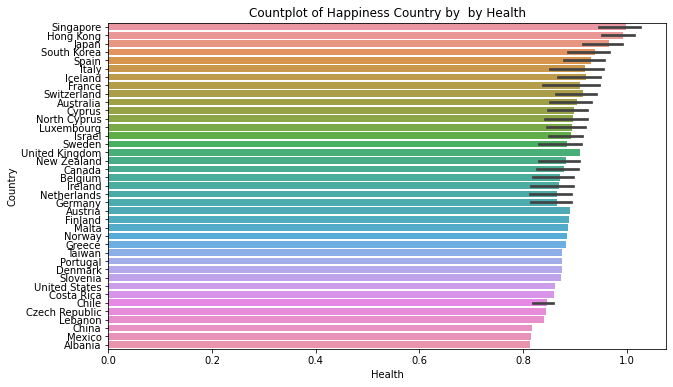

In [25]:
Health_c = Data.sort_values(by='Health', ascending=False)[:100]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=Health_c.Country, x=Health_c.Health)
plt.xticks()
plt.xlabel('Health')
plt.ylabel('Country')
plt.title('Countplot of Happiness Country by  by Health')
plt.show()

# Comparing  Trust (Government Corruption) each Country

Here we are comparing the Trust with each Country, first group the Country and get max,min and avg of Trust

In [26]:

display(Data[["Country","Trust",]].groupby(["Country"]).agg(["max",'mean',"min"]).style.background_gradient(cmap="Blues"))



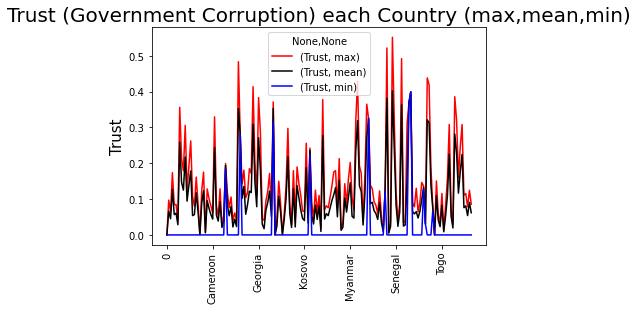

In [27]:
# here we are ploting these values using lineplot
Data[["Country","Trust",]].groupby(["Country"]).agg(["max",'mean',"min"]).plot(kind="line",color =["red","black","blue"])
plt.title("Trust (Government Corruption) each Country (max,mean,min)", fontsize=20)
plt.ylabel("Trust",fontsize=15)
plt.xlabel(" ")
plt.xticks(rotation=90)
plt.show()

# Comparing  Freedom each Country

Here we are comparing the Freedom with each Country, first group the Country and get max,min and avg of Freedom

In [28]:

display(Data[["Country","Freedom",]].groupby(["Country"]).agg(["max",'mean',"min"]).style.background_gradient(cmap="BuPu_r"))

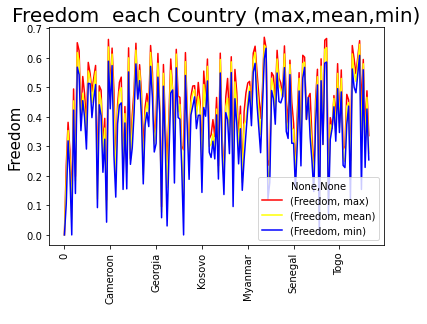

In [29]:
Data[["Country","Freedom",]].groupby(["Country"]).agg(["max",'mean',"min"]).plot(kind="line",color =["red","yellow","blue"])
plt.title("Freedom  each Country (max,mean,min)", fontsize=20)
plt.ylabel("Freedom",fontsize=15)
plt.xlabel(" ")
plt.xticks(rotation=90)
plt.show()

 # Comparing  Health (Life Expectancy) each Country
 
Here we are comparing the Health with each Country ,first group the Country and get max,min and avg of Health

In [30]:

display(Data[["Country","Health",]].groupby(["Country"]).agg(["max",'mean',"min"]).style.background_gradient(cmap="Oranges"))

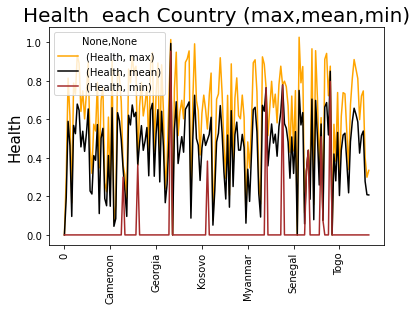

In [31]:
Data[["Country","Health",]].groupby(["Country"]).agg(["max",'mean',"min"]).plot(kind="line",color =["orange","black","brown"])
plt.title("Health  each Country (max,mean,min)", fontsize=20)
plt.ylabel("Health",fontsize=15)
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.show()

# Comparing Economy GDP per Capita each Country


Here we are comparing the Economy_GDPperCapita with each Country, first group the Country and get max,min and avg of Economy_GDPperCapita

In [32]:

display(Data[["Country","Economy_GDPperCapita",]].groupby(["Country"]).agg(["max",'mean',"min"]).style.background_gradient(cmap="CMRmap_r"))

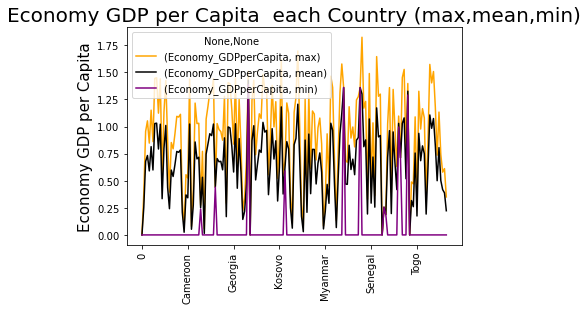

In [33]:
Data[["Country","Economy_GDPperCapita",]].groupby(["Country"]).agg(["max",'mean',"min"]).plot(kind="line",color =["orange","black","purple"])
plt.title("Economy GDP per Capita  each Country (max,mean,min)", fontsize=20)
plt.ylabel("Economy GDP per Capita",fontsize=15)
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.show()

# Comparing Family each Country


Here we are comparing the Family with each Country , first group the Country and get max,min and avg of Family

In [34]:
display(Data[["Country","Family",]].groupby(["Country"]).agg(["max",'mean',"min"]).style.background_gradient(cmap="GnBu"))

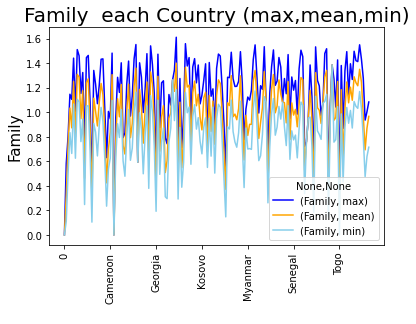

In [35]:
# here we are ploting these values using lineplot
Data[["Country","Family",]].groupby(["Country"]).agg(["max",'mean',"min"]).plot(kind="line",color =["blue","orange","skyblue"])
plt.title("Family  each Country (max,mean,min)", fontsize=20)
plt.ylabel("Family",fontsize=15)
plt.xlabel(" ")
plt.xticks(rotation=90)
plt.show()